In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# CSV
import csv

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC

import sklearn
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.compose import ColumnTransformer 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, make_scorer

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC

import math
from sklearn.metrics import mean_squared_error

from lightgbm import LGBMClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

#Import the SMOTE-NC
from imblearn.over_sampling import SMOTENC

from datetime import datetime

### Read from telco_churn_cleaned.csv

In [9]:
customer_df = pd.read_csv('telco_churn_cleaned.csv')

In [10]:
customer_df

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,internet_service_dsl,internet_service_fiber_optic,internet_service_no,contract_month_to_month,contract_one_year,contract_two_year,payment_method_bank_transfer,payment_method_credit_card,payment_method_electronic_check,payment_method_mailed_check
0,0,1,0,0.013889,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0.472222,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0.027778,0,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0.625000,0,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0.027778,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,0.333333,1,1,0,1,1,1,...,1,0,0,0,1,0,0,0,0,1
7039,0,1,1,1.000000,1,0,1,1,0,1,...,0,1,0,0,1,0,0,1,0,0
7040,0,1,1,0.152778,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,0,0.055556,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [11]:
X = customer_df.drop(columns={'Churn'})
y = customer_df['Churn']

## SMOTE-NC

In [12]:
#Create the oversampler. For SMOTE-NC we need to pinpoint the column position where is the categorical features are. In this case, 'IsActiveMember' is positioned in the second column we input [1] as the parameter. If you have more than one categorical columns, just input all the columns position
smotenc = SMOTENC([0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],random_state = 424)
X, y = smotenc.fit_resample(X, y)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 424)

## Decision Tree Base Classifier

In [7]:
dt_clf = DecisionTreeClassifier()  
dt_clf.fit(X_train, y_train)

dt_predictions = dt_clf.predict(X_test)

In [8]:
dt_conf_matrix = confusion_matrix(y_test, dt_predictions)
dt_tn = dt_conf_matrix[0][0]
dt_fn = dt_conf_matrix[1][0]
dt_tp = dt_conf_matrix[1][1]
dt_fp = dt_conf_matrix[0][1]
print(dt_tn)
print(dt_fn)
print(dt_tp)
print(dt_fp)

854
227
774
215


In [10]:
dt_accuracy = (dt_tp + dt_tn) / (dt_tp + dt_tn + dt_fp + dt_fn)
dt_precision = dt_tp / (dt_tp + dt_fp)
dt_recall = dt_tp / (dt_tp + dt_fn)
dt_f1_score = 2 * ((dt_precision * dt_recall) / (dt_precision + dt_recall))

print('Decision Tree Accuracy Score: ' + str(dt_accuracy))
print('Decision Tree Precision Score: ' + str(dt_precision))
print('Decision Tree Recall Score: ' + str(dt_recall))
print('Decision Tree F1-Score: ' + str(dt_f1_score))
print(f"RMSE for KNN: {math.sqrt(mean_squared_error(y_test,dt_predictions))}")

Decision Tree Accuracy Score: 0.7864734299516908
Decision Tree Precision Score: 0.782608695652174
Decision Tree Recall Score: 0.7732267732267732
Decision Tree F1-Score: 0.7778894472361809
RMSE for KNN: 0.4620893528835188


## Decision Tree after Hyperparameters Tuning

In [11]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=10)  
model.fit(X_train, y_train)

#Use the trained model to predict the test data
y_pred = model.predict(X_test)

# Find the confusion matrix of the result
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Find the accuracy and F1 score of the result
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test,y_pred))

# Find the accuracy and F1 score of the result
print('Accuracy: ' + str(accuracy))
print('Precision: ' + str(precision))
print('Recall: ' + str(recall))
print('F1: ' + str(f1))
print('RMSE: ' + str(rmse))

[[824 245]
 [194 807]]
Accuracy: 0.7879227053140097
Precision: 0.7671102661596958
Recall: 0.8061938061938062
F1: 0.7861665854846566
RMSE: 0.46051850634474


## Decision Tree w/ AdaBoost

In [28]:
# - n_estimator is the number of base classifiers (i.e. weak learners)
# - learning_rate controls the weight adjustments of each base classifiers. 
model = AdaBoostClassifier(n_estimators=400,learning_rate=0.1,base_estimator=dt_clf, random_state=424)

#Fit the training feature Xs and training label Ys
model.fit(X_train, y_train)

#Use the trained model to predict the test data
y_pred = model.predict(X_test)

# Find the confusion matrix of the result
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Find the accuracy, precision, recall and F1 score of the result
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test,y_pred))

print('Accuracy: ' + str(accuracy))
print('Precision: ' + str(precision))
print('Recall: ' + str(recall))
print('F1: ' + str(f1))
print('RMSE: ' + str(rmse))

[[905 164]
 [165 836]]
Accuracy: 0.8410628019323672
Precision: 0.836
Recall: 0.8351648351648352
F1: 0.8355822088955521
RMSE: 0.39866928407846125


## Decision Tree w/ Bagging

In [13]:
# Create the Bagging classifier. Default base classifiers is Decision Tree. 
# - n_estimator is the number of base classifiers (i.e. weak learners)
model = BaggingClassifier(n_estimators=500, base_estimator=dt_clf)

#Fit the training feature Xs and training label Ys
model.fit(X_train, y_train)

#Use the trained model to predict the test data
y_pred = model.predict(X_test)

# Find the confusion matrix of the result
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Find the accuracy, precision, recall and F1 score of the resultaccuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test,y_pred))

# Find the accuracy and F1 score of the result
print('Accuracy: ' + str(accuracy))
print('Precision: ' + str(precision))
print('Recall: ' + str(recall))
print('F1: ' + str(f1))
print('RMSE: ' + str(rmse))

[[880 189]
 [147 854]]
Accuracy: 0.8376811594202899
Precision: 0.8187919463087249
Recall: 0.8531468531468531
F1: 0.8356164383561643
RMSE: 0.4028881241482679


## Random Forest Base Classifier

In [14]:
model = RandomForestClassifier()

#Fit the training feature Xs and training label Ys
model.fit(X_train, y_train)

#Use the trained model to predict the test data
y_pred = model.predict(X_test)

# Find the confusion matrix of the result
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Find the accuracy and F1 score of the result
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test,y_pred))

# Find the accuracy and F1 score of the result
print('Accuracy: ' + str(accuracy))
print('Precision: ' + str(precision))
print('Recall: ' + str(recall))
print('F1: ' + str(f1))
print('RMSE: ' + str(rmse))

[[896 173]
 [138 863]]
Accuracy: 0.8497584541062801
Precision: 0.833011583011583
Recall: 0.8621378621378621
F1: 0.8473244968090328
RMSE: 0.3876100435924227


## Random Forest after Hyperparameters Tuning

In [15]:
clf = RandomForestClassifier(n_estimators=500, random_state=424)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=424)

In [16]:
rfc_predictions = clf.predict(X_test)

In [17]:
rfc_conf_matrix = confusion_matrix(y_test, rfc_predictions)

In [18]:
rfc_conf_matrix

array([[906, 163],
       [135, 866]], dtype=int64)

In [19]:
rfc_tn = rfc_conf_matrix[0][0]
rfc_fn = rfc_conf_matrix[1][0]
rfc_tp = rfc_conf_matrix[1][1]
rfc_fp = rfc_conf_matrix[0][1]
print(rfc_tp)
print(rfc_tn)
print(rfc_fp)
print(rfc_fn)

866
906
163
135


In [20]:
rfc_accuracy = (rfc_tp + rfc_tn) / (rfc_tp + rfc_tn + rfc_fp + rfc_fn)
rfc_precision = rfc_tp / (rfc_tp + rfc_fp)
rfc_recall = rfc_tp / (rfc_tp + rfc_fn)
rfc_f1_score = 2 * ((rfc_precision * rfc_recall) / (rfc_precision + rfc_recall))

print('Random Forest Accuracy Score: ' + str(rfc_accuracy))
print('Random Forest Precision Score: ' + str(rfc_precision))
print('Random Forest Recall Score: ' + str(rfc_recall))
print('Random Forest F1-Score: ' + str(rfc_f1_score))

Random Forest Accuracy Score: 0.8560386473429952
Random Forest Precision Score: 0.8415937803692906
Random Forest Recall Score: 0.8651348651348651
Random Forest F1-Score: 0.8532019704433498


https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

## Naive Bayes Base Classifier 

Note: NB no hyperparameters tuning because no applicable

In [21]:
#Initialize or define the model
nb = GaussianNB()

#Fit the training feature Xs and training label Ys
nb.fit(X_train, y_train)

#Use the trained model to predict the test data
predictions_nb= nb.predict(X_test)

#Find the confusion matrix of the result
cm = confusion_matrix(y_test, predictions_nb)
print(cm)

#Print the accuracy, precision, recall, and F1 score of the result
print(f"Accuracy for Naive Bayes: {accuracy_score(y_test, predictions_nb)}")
print(f"Precision for Naive Bayes: {precision_score(y_test, predictions_nb)}")
print(f"Recall for Naive Bayes: {recall_score(y_test, predictions_nb)}")
print(f"F1-Score for Naive Bayes: {f1_score(y_test, predictions_nb)}")

[[788 281]
 [178 823]]
Accuracy for Naive Bayes: 0.7782608695652173
Precision for Naive Bayes: 0.7454710144927537
Recall for Naive Bayes: 0.8221778221778222
F1-Score for Naive Bayes: 0.7819477434679335


## Naive Bayes after Hyperparameters Tuning

In [16]:
model = GaussianNB(var_smoothing=0.008111308307896872)  
model.fit(X_train, y_train)

#Use the trained model to predict the test data
y_pred = model.predict(X_test)

# Find the confusion matrix of the result
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Find the accuracy and F1 score of the result
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test,y_pred))

# Find the accuracy and F1 score of the result
print('Accuracy: ' + str(accuracy))
print('Precision: ' + str(precision))
print('Recall: ' + str(recall))
print('F1: ' + str(f1))
print('RMSE: ' + str(rmse))

[[787 282]
 [178 823]]
Accuracy: 0.7777777777777778
Precision: 0.7447963800904978
Recall: 0.8221778221778222
F1: 0.7815764482431149
RMSE: 0.4714045207910317


## Naive Bayes w/ AdaBoost (Not recommended to use AdaBoost here)

https://www.researchgate.net/publication/220541785_A_Study_of_AdaBoost_with_Naive_Bayesian_Classifiers_Weakness_and_Improvement

In [22]:
# - n_estimator is the number of base classifiers (i.e. weak learners)
# - learning_rate controls the weight adjustments of each base classifiers. Default is 1
model = AdaBoostClassifier(n_estimators=400,learning_rate=0.1,base_estimator=nb, random_state=424)

#Fit the training feature Xs and training label Ys
model.fit(X_train, y_train)

#Use the trained model to predict the test data
y_pred = model.predict(X_test)

# Find the confusion matrix of the result
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Find the accuracy and F1 score of the result
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test,y_pred))

# Note: Precision and Recall are missing here, you could add them for the baseline

print('Accuracy: ' + str(accuracy))
print('Precision: ' + str(precision))
print('Recall: ' + str(recall))
print('F1: ' + str(f1))
print('RMSE: ' + str(rmse))

[[825 244]
 [182 819]]
Accuracy: 0.7942028985507247
Precision: 0.7704609595484478
Recall: 0.8181818181818182
F1: 0.7936046511627907
RMSE: 0.4536486541909668


## Naive Bayes w/ Bagging (No effect)

In [23]:
#For Bagging implementation
from sklearn.ensemble import BaggingClassifier

#Create the Bagging classifier. Default base classifiers is Decision Tree. 
# - n_estimator is the number of base classifiers (i.e. weak learners)
model = BaggingClassifier(n_estimators=100, base_estimator=nb)

#Fit the training feature Xs and training label Ys
model.fit(X_train, y_train)

#Use the trained model to predict the test data
y_pred = model.predict(X_test)

# Find the confusion matrix of the result
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Find the accuracy and F1 score of the result
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test,y_pred))

# Find the accuracy and F1 score of the result
print('Accuracy: ' + str(accuracy))
print('Precision: ' + str(precision))
print('Recall: ' + str(recall))
print('F1: ' + str(f1))
print('RMSE' + str(rmse))

[[788 281]
 [178 823]]
Accuracy: 0.7782608695652173
Precision: 0.7454710144927537
Recall: 0.8221778221778222
F1: 0.7819477434679335
RMSE0.47089184579347154


## Logistic Regression Base Classifier

In [15]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)
predictions_logreg = logreg.predict(X_test)
cm_logreg = confusion_matrix(y_test, predictions_logreg)
rmse = math.sqrt(mean_squared_error(y_test,predictions_logreg))

#Print the accuracy, precision, recall, and F1 score of the result
print(f"Confusion Matrix for Logistic Regression: {cm_logreg}")
print(f"Accuracy for Logistic Regression: {accuracy_score(y_test, predictions_logreg)}")
print(f"Precision for Logistic Regression: {precision_score(y_test, predictions_logreg)}")
print(f"Recall for Logistic Regression: {recall_score(y_test, predictions_logreg)}")
print(f"F1-Score for Logistic Regression: {f1_score(y_test, predictions_logreg)}")
print('RMSE: ' + str(rmse))

Confusion Matrix for Logistic Regression: [[821 248]
 [175 826]]
Accuracy for Logistic Regression: 0.7956521739130434
Precision for Logistic Regression: 0.7690875232774674
Recall for Logistic Regression: 0.8251748251748252
F1-Score for Logistic Regression: 0.7961445783132531
RMSE: 0.4520484775850446


/Users/jon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Logistic Regression after Hyperparameters Tuning

In [25]:
logreg = LogisticRegression(solver='lbfgs', penalty='none', random_state=424, max_iter=100)
logreg.fit(X_train, y_train)
predictions_logreg = logreg.predict(X_test)
cm_logreg = confusion_matrix(y_test, predictions_logreg)
rmse = math.sqrt(mean_squared_error(y_test,y_pred))

#Print the accuracy, precision, recall, and F1 score of the result
print(f"Accuracy for Logistic Regression: {accuracy_score(y_test, predictions_logreg)}")
print(f"Precision for Logistic Regression: {precision_score(y_test, predictions_logreg)}")
print(f"Recall for Logistic Regression: {recall_score(y_test, predictions_logreg)}")
print(f"F1-Score for Logistic Regression: {f1_score(y_test, predictions_logreg)}")
print('RMSE: ' + str(rmse))

Accuracy for Logistic Regression: 0.7951690821256039
Precision for Logistic Regression: 0.7649219467401286
Recall for Logistic Regression: 0.8321678321678322
F1-Score for Logistic Regression: 0.7971291866028708
RMSE: 0.47089184579347154


## Logistic Regression w/ AdaBoost

In [29]:
# Follow the baseline's setup
#For AdaBoost implementation
from sklearn.ensemble import AdaBoostClassifier

#Create the AdaBoost classifier
# - n_estimator is the number of base classifiers (i.e. weak learners)
# - learning_rate controls the weight adjustments of each base classifiers. Default is 1
model = AdaBoostClassifier(n_estimators=100,learning_rate=0.1,base_estimator=logreg)

#Fit the training feature Xs and training label Ys
model.fit(X_train, y_train)

#Use the trained model to predict the test data
y_pred = model.predict(X_test)

# Find the confusion matrix of the result
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Find the accuracy and F1 score of the result
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test,y_pred))


# Note: Precision and Recall are missing here, you could add them for the baseline

print('AdaBoost w/ LR Accuracy: ' + str(accuracy))
print('AdaBoost w/ LR Precision: ' + str(precision))
print('AdaBoost w/ LR Recall: ' + str(recall))

print('AdaBoost w/ LR F1: ' + str(f1))
print('RMSE: ' + str(rmse))

[[815 254]
 [171 830]]
AdaBoost w/ LR Accuracy: 0.7946859903381642
AdaBoost w/ LR Precision: 0.7656826568265682
AdaBoost w/ LR Recall: 0.8291708291708292
AdaBoost w/ LR F1: 0.7961630695443644
RMSE: 0.45311588988010093


## Logistic Regression w/ Bagging

In [30]:
#For Bagging implementation
from sklearn.ensemble import BaggingClassifier

#Create the Bagging classifier. Default base classifiers is Decision Tree. 
# - n_estimator is the number of base classifiers (i.e. weak learners)
model = BaggingClassifier(n_estimators=100, base_estimator=logreg)

#Fit the training feature Xs and training label Ys
model.fit(X_train, y_train)

#Use the trained model to predict the test data
y_pred = model.predict(X_test)

# Find the confusion matrix of the result
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Find the accuracy and F1 score of the result
print(f"Accuracy for Logistic Regression: {accuracy_score(y_test, y_pred)}")
print(f"Precision for Logistic Regression: {precision_score(y_test, y_pred)}")
print(f"Recall for Logistic Regression: {recall_score(y_test, y_pred)}")
print(f"F1-Score for Logistic Regression: {f1_score(y_test, y_pred)}")

C:\Users\Samuel Thong\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Samuel Thong\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

C:\Users\Samuel Thong\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Samuel Thong\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

C:\Users\Samuel Thong\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Samuel Thong\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

C:\Users\Samuel Thong\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Samuel Thong\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

C:\Users\Samuel Thong\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Samuel Thong\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

C:\Users\Samuel Thong\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Samuel Thong\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

[[814 255]
 [167 834]]
Accuracy for Logistic Regression: 0.7961352657004831
Precision for Logistic Regression: 0.7658402203856749
Recall for Logistic Regression: 0.8331668331668332
F1-Score for Logistic Regression: 0.7980861244019138


C:\Users\Samuel Thong\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## SVM Base Classifier

In [31]:
start=datetime.now()

#Initialize or define the model
linearSVC_svm = LinearSVC()

#Fit the training feature Xs and training label Ys
linearSVC_svm.fit(X_train, y_train)

#Use the trained model to predict the test data
linearSVC_svm_pred = linearSVC_svm.predict(X_test)

#Find the confusion matrix of the result
print('Confusion Matrix:')
print(confusion_matrix(y_test, linearSVC_svm_pred))

linearSVC_svm_accuracy = accuracy_score(y_test, linearSVC_svm_pred)
print('linearSVC Accuracy: ' + str(linearSVC_svm_accuracy))

linearSVC_svm_precision = precision_score(y_test, linearSVC_svm_pred)
print('linearSVC Precision: ' + str(linearSVC_svm_precision))

linearSVC_svm_recall = recall_score(y_test, linearSVC_svm_pred)
print('linearSVC Recall: ' + str(linearSVC_svm_recall))

linearSVC_svm_f1 = f1_score(y_test, linearSVC_svm_pred)
print('linearSVC F1: ' + str(linearSVC_svm_f1))

print('Time taken:')
print(datetime.now()-start)

Confusion Matrix:
[[813 256]
 [168 833]]
linearSVC Accuracy: 0.7951690821256039
linearSVC Precision: 0.7649219467401286
linearSVC Recall: 0.8321678321678322
linearSVC F1: 0.7971291866028708
Time taken:
0:00:00.167524


## SVM after Hyperparameters Tuning

In [32]:
from datetime import datetime

from sklearn.svm import LinearSVC
#from sklearn.svm import SVC 

#Your code here. The following comments are just for your reference

#ADDED MYSELF
start=datetime.now()
#END

#Initialize or define the model
linearSVC_svm = LinearSVC(C=0.5, max_iter=1000)

#Fit the training feature Xs and training label Ys
linearSVC_svm.fit(X_train, y_train)

#Use the trained model to predict the test data
linearSVC_svm_pred = linearSVC_svm.predict(X_test)

#Find the confusion matrix of the result
print('Confusion Matrix:')
print(confusion_matrix(y_test, linearSVC_svm_pred))

#Print the accuracy, precision, recall, and F1 score of the result
# print('Accuracy:')
# print(linearSVC_svm.score(X_test, y_test))
linearSVC_svm_accuracy = accuracy_score(y_test, linearSVC_svm_pred)
print('linearSVC Accuracy: ' + str(linearSVC_svm_accuracy))

linearSVC_svm_precision = precision_score(y_test, linearSVC_svm_pred)
print('linearSVC Precision: ' + str(linearSVC_svm_precision))

linearSVC_svm_recall = recall_score(y_test, linearSVC_svm_pred)
print('linearSVC Recall: ' + str(linearSVC_svm_recall))

linearSVC_svm_f1 = f1_score(y_test, linearSVC_svm_pred)
print('linearSVC F1: ' + str(linearSVC_svm_f1))

print('Time taken:')
print(datetime.now()-start)

Confusion Matrix:
[[812 257]
 [167 834]]
linearSVC Accuracy: 0.7951690821256039
linearSVC Precision: 0.7644362969752521
linearSVC Recall: 0.8331668331668332
linearSVC F1: 0.7973231357552581
Time taken:
0:00:00.109408


### SVM w/ AdaBoost

In [33]:
# Follow the baseline's setup

#Create the AdaBoost classifier
# - n_estimator is the number of base classifiers (i.e. weak learners)
# - learning_rate controls the weight adjustments of each base classifiers. Default is 1
ada_linearSVC_svm_model = AdaBoostClassifier(n_estimators=100,learning_rate=0.1,base_estimator=linearSVC_svm, algorithm='SAMME')

#Fit the training feature Xs and training label Ys
ada_linearSVC_svm_model.fit(X_train, y_train)

#Use the trained model to predict the test data
ada_linearSVC_svm_ypred = ada_linearSVC_svm_model.predict(X_test)

# Find the confusion matrix of the result
ada_linearSVC_svm_cm = confusion_matrix(y_test, ada_linearSVC_svm_ypred)
print(ada_linearSVC_svm_cm)

# Find the accuracy and F1 score of the result
ada_linearSVC_svm_accuracy = accuracy_score(y_test, ada_linearSVC_svm_ypred)
ada_linearSVC_svm_precision = precision_score(y_test, ada_linearSVC_svm_ypred)
ada_linearSVC_svm_recall = recall_score(y_test, ada_linearSVC_svm_ypred)

ada_linearSVC_svm_f1 = f1_score(y_test, ada_linearSVC_svm_ypred)

# Note: Precision and Recall are missing here, you could add them for the baseline

print('ada_LinearSVC_SVM accuracy: ' + str(ada_linearSVC_svm_accuracy))
print('ada_LinearSVC_SVM precision: ' + str(ada_linearSVC_svm_precision))
print('ada_LinearSVC_SVM recall: ' + str(ada_linearSVC_svm_recall))

print('ada_LinearSVC_SVM f1: ' + str(ada_linearSVC_svm_f1))

start=datetime.now()
print('Time taken:')
print(datetime.now()-start)

[[832 237]
 [199 802]]
ada_LinearSVC_SVM accuracy: 0.7893719806763285
ada_LinearSVC_SVM precision: 0.7718960538979788
ada_LinearSVC_SVM recall: 0.8011988011988012
ada_LinearSVC_SVM f1: 0.7862745098039217
Time taken:
0:00:00


## SVM w/ Bagging

In [34]:
#For Bagging implementation
from sklearn.ensemble import BaggingClassifier

#Create the Bagging classifier. Default base classifiers is Decision Tree. 
# - n_estimator is the number of base classifiers (i.e. weak learners)
model = BaggingClassifier(n_estimators=200, base_estimator=linearSVC_svm)

#Fit the training feature Xs and training label Ys
model.fit(X_train, y_train)

#Use the trained model to predict the test data
y_pred = model.predict(X_test)

# Find the confusion matrix of the result
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Find the accuracy and F1 score of the result
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1-Score: {f1_score(y_test, y_pred)}")

C:\Users\Samuel Thong\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Samuel Thong\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Samuel Thong\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Samuel Thong\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Samuel Thong\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Samuel Thong\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinea

[[812 257]
 [167 834]]
Accuracy: 0.7951690821256039
Precision: 0.7644362969752521
Recall: 0.8331668331668332
F1-Score: 0.7973231357552581


# Light GBM

In [36]:
classifier_lgbm = LGBMClassifier()

# Defining the Classification Model
def model(classifier,X_train,y_train,X_test,y_test):
    
    classifier.fit(X_train,y_train)
    prediction = classifier.predict(X_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score for LGBM: ",'{0:.2%}'.format(cross_val_score(classifier,X_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("Accuracy Score for LGBM : ", accuracy_score(y_test, prediction))
    print("Precision Score for LGBM : ", precision_score(y_test, prediction))
    print("Recall Score for LGBM : ", recall_score(y_test, prediction))
    print("F1-Score Score for LGBM : ", f1_score(y_test, prediction))
    print("RMSE Score for LGBM : ", math.sqrt(mean_squared_error(y_test,prediction)))

    
model(classifier_lgbm,X_train,y_train,X_test,y_test)

Cross Validation Score for LGBM:  91.24%
Accuracy Score for LGBM :  0.836231884057971
Precision Score for LGBM :  0.8134469696969697
Recall Score for LGBM :  0.8581418581418582
F1-Score Score for LGBM :  0.8351968886728245
RMSE Score for LGBM :  0.40468273491962686


# Light GBM with Hyper Parameters Tuning

In [38]:
classifier_lgbm = LGBMClassifier(
    reg_alpha= 0,
    reg_lambda= 0,
    colsample_bytree= 0.6,
    subsample= 0.8,
    learning_rate= 0.02,
    max_depth= 20,
    num_leaves= 300,
    min_child_samples= 10)

# Defining the Classification Model
def model(classifier,X_train,y_train,X_test,y_test):
    
    classifier.fit(X_train,y_train)
    prediction = classifier.predict(X_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score for LGBM: ",'{0:.2%}'.format(cross_val_score(classifier,X_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("Accuracy Score for LGBM : ", accuracy_score(y_test, prediction))
    print("Precision Score for LGBM : ", precision_score(y_test, prediction))
    print("Recall Score for LGBM : ", recall_score(y_test, prediction))
    print("F1-Score Score for LGBM : ", f1_score(y_test, prediction))
    print("RMSE Score for LGBM : ", math.sqrt(mean_squared_error(y_test,prediction)))

    
model(classifier_lgbm,X_train,y_train,X_test,y_test)

Cross Validation Score for LGBM:  91.31%
Accuracy Score for LGBM :  0.8415458937198068
Precision Score for LGBM :  0.8232468780019212
Recall Score for LGBM :  0.8561438561438561
F1-Score Score for LGBM :  0.8393731635651323
RMSE Score for LGBM :  0.3980629426110816


# Neural Network

Epoch 1/200
259/259 - 1s - loss: 0.6205 - accuracy: 0.7155 - val_loss: 0.4743 - val_accuracy: 0.7831 - 887ms/epoch - 3ms/step
Epoch 2/200
259/259 - 0s - loss: 0.4713 - accuracy: 0.7770 - val_loss: 0.4549 - val_accuracy: 0.7952 - 404ms/epoch - 2ms/step
Epoch 3/200
259/259 - 0s - loss: 0.4612 - accuracy: 0.7804 - val_loss: 0.4482 - val_accuracy: 0.7947 - 383ms/epoch - 1ms/step
Epoch 4/200
259/259 - 0s - loss: 0.4542 - accuracy: 0.7836 - val_loss: 0.4449 - val_accuracy: 0.8005 - 357ms/epoch - 1ms/step
Epoch 5/200
259/259 - 0s - loss: 0.4504 - accuracy: 0.7822 - val_loss: 0.4488 - val_accuracy: 0.7942 - 353ms/epoch - 1ms/step
Epoch 6/200
259/259 - 1s - loss: 0.4467 - accuracy: 0.7864 - val_loss: 0.4412 - val_accuracy: 0.7981 - 534ms/epoch - 2ms/step
Epoch 7/200
259/259 - 0s - loss: 0.4440 - accuracy: 0.7863 - val_loss: 0.4395 - val_accuracy: 0.7971 - 442ms/epoch - 2ms/step
Epoch 8/200
259/259 - 0s - loss: 0.4399 - accuracy: 0.7933 - val_loss: 0.4366 - val_accuracy: 0.7995 - 392ms/epoch - 2

Epoch 66/200
259/259 - 1s - loss: 0.3918 - accuracy: 0.8239 - val_loss: 0.4344 - val_accuracy: 0.8101 - 709ms/epoch - 3ms/step
Epoch 67/200
259/259 - 0s - loss: 0.3887 - accuracy: 0.8269 - val_loss: 0.4318 - val_accuracy: 0.8116 - 448ms/epoch - 2ms/step
Epoch 68/200
259/259 - 1s - loss: 0.3889 - accuracy: 0.8258 - val_loss: 0.4304 - val_accuracy: 0.8169 - 574ms/epoch - 2ms/step
Epoch 69/200
259/259 - 0s - loss: 0.3884 - accuracy: 0.8287 - val_loss: 0.4337 - val_accuracy: 0.8082 - 448ms/epoch - 2ms/step
Epoch 70/200
259/259 - 1s - loss: 0.3895 - accuracy: 0.8275 - val_loss: 0.4325 - val_accuracy: 0.8130 - 568ms/epoch - 2ms/step
Epoch 71/200
259/259 - 1s - loss: 0.3881 - accuracy: 0.8253 - val_loss: 0.4317 - val_accuracy: 0.8106 - 614ms/epoch - 2ms/step
Epoch 72/200
259/259 - 0s - loss: 0.3877 - accuracy: 0.8271 - val_loss: 0.4314 - val_accuracy: 0.8155 - 475ms/epoch - 2ms/step
Epoch 73/200
259/259 - 1s - loss: 0.3875 - accuracy: 0.8264 - val_loss: 0.4326 - val_accuracy: 0.8092 - 519ms/e

Epoch 131/200
259/259 - 0s - loss: 0.3718 - accuracy: 0.8363 - val_loss: 0.4435 - val_accuracy: 0.8063 - 409ms/epoch - 2ms/step
Epoch 132/200
259/259 - 0s - loss: 0.3717 - accuracy: 0.8363 - val_loss: 0.4498 - val_accuracy: 0.8053 - 410ms/epoch - 2ms/step
Epoch 133/200
259/259 - 0s - loss: 0.3723 - accuracy: 0.8352 - val_loss: 0.4451 - val_accuracy: 0.8058 - 411ms/epoch - 2ms/step
Epoch 134/200
259/259 - 0s - loss: 0.3706 - accuracy: 0.8346 - val_loss: 0.4445 - val_accuracy: 0.8058 - 430ms/epoch - 2ms/step
Epoch 135/200
259/259 - 0s - loss: 0.3715 - accuracy: 0.8352 - val_loss: 0.4443 - val_accuracy: 0.8048 - 419ms/epoch - 2ms/step
Epoch 136/200
259/259 - 0s - loss: 0.3712 - accuracy: 0.8373 - val_loss: 0.4513 - val_accuracy: 0.7971 - 407ms/epoch - 2ms/step
Epoch 137/200
259/259 - 0s - loss: 0.3708 - accuracy: 0.8351 - val_loss: 0.4489 - val_accuracy: 0.8053 - 417ms/epoch - 2ms/step
Epoch 138/200
259/259 - 0s - loss: 0.3705 - accuracy: 0.8357 - val_loss: 0.4426 - val_accuracy: 0.8121 -

259/259 - 1s - loss: 0.3616 - accuracy: 0.8408 - val_loss: 0.4473 - val_accuracy: 0.8116 - 537ms/epoch - 2ms/step
Epoch 196/200
259/259 - 1s - loss: 0.3608 - accuracy: 0.8442 - val_loss: 0.4527 - val_accuracy: 0.8077 - 512ms/epoch - 2ms/step
Epoch 197/200
259/259 - 1s - loss: 0.3609 - accuracy: 0.8414 - val_loss: 0.4475 - val_accuracy: 0.8116 - 523ms/epoch - 2ms/step
Epoch 198/200
259/259 - 1s - loss: 0.3603 - accuracy: 0.8427 - val_loss: 0.4517 - val_accuracy: 0.8053 - 535ms/epoch - 2ms/step
Epoch 199/200
259/259 - 1s - loss: 0.3602 - accuracy: 0.8422 - val_loss: 0.4528 - val_accuracy: 0.8155 - 526ms/epoch - 2ms/step
Epoch 200/200
259/259 - 1s - loss: 0.3603 - accuracy: 0.8387 - val_loss: 0.4532 - val_accuracy: 0.8024 - 533ms/epoch - 2ms/step
65/65 [==============================] - 0s 2ms/step
[0 1 1 ... 1 1 0]
Accuracy: 0.8024154589371981
Precision: 0.8471528471528471
Recall: 0.7681159420289855
f1-score: 0.8057007125890735
rmse: 0.4445048268160897


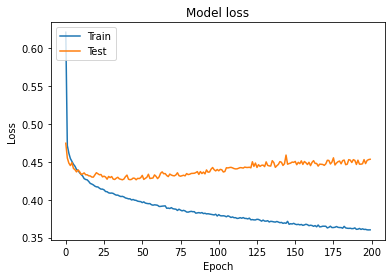

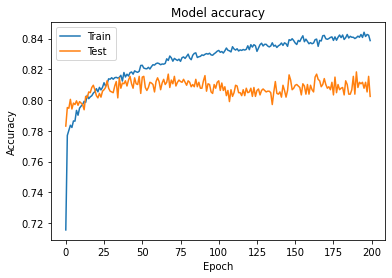

In [48]:
model = Sequential()

model.add(Dense(18, input_dim=24, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])


history=model.fit(X_train, y_train,
          batch_size=32,
          epochs=200,
          verbose=2,
          validation_data=(X_test, y_test)) 
                
y_pred = model.predict(X_test)
pred = np.argmax(y_pred, axis=1)

print(pred)

a=accuracy_score(pred, y_test)

precision=precision_score(pred,y_test)
recall=recall_score(pred,y_test)
f1=(2*(precision*recall))/(precision+recall)
rmse=math.sqrt(mean_squared_error(y_test,pred))
#Printthe accuracy, precision, recall, and F1 score of the result

print("Accuracy:",a)
print("Precision:",precision)
print("Recall:",recall)
print("f1-score:", f1)
print("rmse:", rmse)

#Plot the loss curve
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

#Plot the accurcy curve

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Neural Network with Hyper Parameters Tuning

Epoch 1/100
259/259 - 1s - loss: 0.7355 - accuracy: 0.7043 - val_loss: 0.4712 - val_accuracy: 0.7894 - 830ms/epoch - 3ms/step
Epoch 2/100
259/259 - 0s - loss: 0.4752 - accuracy: 0.7758 - val_loss: 0.4538 - val_accuracy: 0.7932 - 321ms/epoch - 1ms/step
Epoch 3/100
259/259 - 0s - loss: 0.4647 - accuracy: 0.7775 - val_loss: 0.4488 - val_accuracy: 0.8014 - 347ms/epoch - 1ms/step
Epoch 4/100
259/259 - 0s - loss: 0.4603 - accuracy: 0.7811 - val_loss: 0.4447 - val_accuracy: 0.7976 - 427ms/epoch - 2ms/step
Epoch 5/100
259/259 - 0s - loss: 0.4553 - accuracy: 0.7862 - val_loss: 0.4423 - val_accuracy: 0.7976 - 391ms/epoch - 2ms/step
Epoch 6/100
259/259 - 0s - loss: 0.4516 - accuracy: 0.7855 - val_loss: 0.4402 - val_accuracy: 0.7971 - 374ms/epoch - 1ms/step
Epoch 7/100
259/259 - 0s - loss: 0.4485 - accuracy: 0.7856 - val_loss: 0.4380 - val_accuracy: 0.7961 - 332ms/epoch - 1ms/step
Epoch 8/100
259/259 - 0s - loss: 0.4458 - accuracy: 0.7869 - val_loss: 0.4354 - val_accuracy: 0.8019 - 311ms/epoch - 1

Epoch 66/100
259/259 - 0s - loss: 0.3824 - accuracy: 0.8259 - val_loss: 0.4260 - val_accuracy: 0.8188 - 390ms/epoch - 2ms/step
Epoch 67/100
259/259 - 0s - loss: 0.3797 - accuracy: 0.8256 - val_loss: 0.4279 - val_accuracy: 0.8213 - 357ms/epoch - 1ms/step
Epoch 68/100
259/259 - 0s - loss: 0.3795 - accuracy: 0.8294 - val_loss: 0.4258 - val_accuracy: 0.8174 - 341ms/epoch - 1ms/step
Epoch 69/100
259/259 - 0s - loss: 0.3785 - accuracy: 0.8281 - val_loss: 0.4246 - val_accuracy: 0.8150 - 365ms/epoch - 1ms/step
Epoch 70/100
259/259 - 0s - loss: 0.3786 - accuracy: 0.8297 - val_loss: 0.4293 - val_accuracy: 0.8101 - 364ms/epoch - 1ms/step
Epoch 71/100
259/259 - 0s - loss: 0.3784 - accuracy: 0.8279 - val_loss: 0.4306 - val_accuracy: 0.8111 - 353ms/epoch - 1ms/step
Epoch 72/100
259/259 - 0s - loss: 0.3780 - accuracy: 0.8289 - val_loss: 0.4263 - val_accuracy: 0.8179 - 349ms/epoch - 1ms/step
Epoch 73/100
259/259 - 0s - loss: 0.3779 - accuracy: 0.8280 - val_loss: 0.4292 - val_accuracy: 0.8198 - 360ms/e

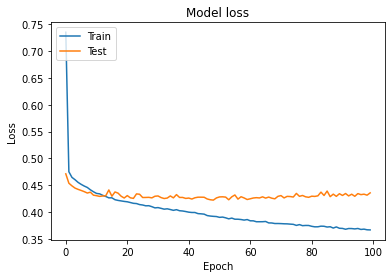

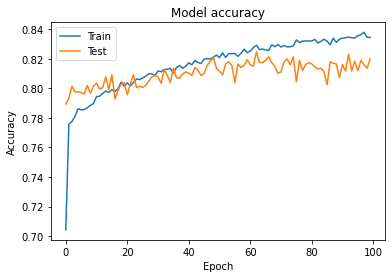

In [49]:
model = Sequential()

model.add(Dense(22, input_dim=24, activation='relu'))
model.add(Dense(14, activation='relu'))
model.add(Dense(5, activation='sigmoid'))
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), 
              metrics=['accuracy'])


history=model.fit(X_train, y_train,
          batch_size=32,
          epochs=100,
          verbose=2,
          validation_data=(X_test, y_test)) 
                
y_pred = model.predict(X_test)
pred = np.argmax(y_pred, axis=1)

print(pred)

a=accuracy_score(pred, y_test)

precision=precision_score(pred,y_test)
recall=recall_score(pred,y_test)
f1=(2*(precision*recall))/(precision+recall)
rmse=math.sqrt(mean_squared_error(y_test,pred))
#Printthe accuracy, precision, recall, and F1 score of the result

print("Accuracy:",a)
print("Precision:",precision)
print("Recall:",recall)
print("f1-score:", f1)
print("rmse:", rmse)

#Plot the loss curve
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

#Plot the accurcy curve

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()